# Microestructuras y Sistemas de Trading
## Laboratorio 1
### Equipo C

## <font color="blue">  "PARADOX OF CHOICE"

* <font color="black">**INTEGRANTE 1 :**</font> Mariana López Correa
* <font color="black">**INTEGRANTE 2 :**</font> Axel Francisco Munguía Quintero

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime , timedelta
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
style.use("ggplot")

In [2]:
data= pd.read_excel("archivo_tradeview_2.xlsx",index_col='openTime').sort_index()
#data.index=pd.DatetimeIndex(data.index)

In [3]:
data.head()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
openTime,,,,,,,,,,,,,
2019.08.27 06:18:03,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27 06:22:44,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27 06:23:44,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27 06:45:16,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27 06:52:01,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


In [4]:
data.index = [data.index[k][:10] for k in range(data.shape[0])]

In [5]:
data.head()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.08.27,24311675,sell,0.04,eurjpy,117.40700,117.7000,0.000,2019.08.27 06:20:11,117.42300,0.0,0,0,-0.61
2019.08.27,24311730,sell,0.04,eurjpy,117.38900,117.7000,0.000,2019.08.27 06:23:28,117.41200,0.0,0,0,-0.87
2019.08.27,24311745,sell,0.04,eurjpy,117.36800,0.0000,0.000,2019.08.27 06:24:13,117.40200,0.0,0,0,-1.29
2019.08.27,24315841,sell,0.05,eurjpy,117.34300,117.6500,117.100,2019.08.27 09:16:08,117.31500,0.0,0,0,1.32
2019.08.27,24315970,sell,0.04,eurusd,1.11005,1.1126,1.107,2019.08.27 09:16:04,1.11027,0.0,0,0,-0.88


In [6]:
data.tail()

,Order,Type,Size,Symbol,openPrice,S/L,T/P,closeTime,closePrice,Commission,Taxes,Swap,Profit
2019.09.25,25159303,sell,0.01,xauusd,1531.28000,1537.0000,0.000,2019.09.25 15:24:35,1527.36000,0.00,0,0,3.92
2019.09.25,25188529,buy,0.08,usdmxn,19.56233,19.5900,19.900,2019.09.26 21:00:44,19.57897,0.00,0,0,6.80
2019.09.25,25188553,buy,0.01,usdmxn,19.56103,19.5900,19.900,2019.09.26 21:00:44,19.58247,0.00,0,0,1.09
2019.09.25,25193432,buy,0.08,eurusd,1.09455,1.0915,1.111,2019.09.26 22:33:46,1.09148,0.00,0,0,-24.56
2019.09.26,25229583,buy,0.09,btcusd,7910.75000,0.0000,0.000,2019.09.27 15:49:19,7986.78000,-1.07,0,0,6.84


In [7]:
dataframes = []
contador = 0
for k in range(len(data.index[1:])):
    if data.index[k-1]==data.index[k]:
        contador +=1 
    else: 
        dataframes.append(data.iloc[(k-contador):k,:])
        contador= 0
dataframes = dataframes[1:]
# Eliminar los espacios vacíos
dataframes = [k for k in dataframes if len(k)>=1]

In [8]:
# Conocer el No. de Activos que tuvieron rendimiento positivo durante el día (Si tuviste más posiciones de pérdia
# que de ganancia sobre un activo no se tomará)
def choose_index(dataframe,l):
    return dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()>0].dropna().values.tolist()
profits_day = [list(zip(*[choose_index(dataframes,l),choose_values(dataframes,l)])) for l in range(len(dataframes))]
profits_day = [l for l in profits_day if len(l)>=1]
profits_day

[[('eurgbp', [16.07]), ('xauusd', [17.92])],
 [('eurusd', [0.27])],
 [('gbpjpy', [21.12])],
 [('usdjpy', [0.34]), ('xauusd', [17.8])],
 [('audusd', [10.270000000000001])],
 [('gbpusd', [9.35])],
 [('usdcad', [12.64])],
 [('eurusd', [22.240000000000002]), ('usdjpy', [2.14])],
 [('eurusd', [17.22]), ('xauusd', [93.06])],
 [('eurusd', [23.34]), ('gbpusd', [34.32])],
 [('eurusd', [5.459999999999999])],
 [('eurusd', [14.46]), ('gbpusd', [1.56]), ('usdmxn', [15.33])],
 [('xauusd', [55.17])]]

In [9]:
# FALTA PONER EJES
# CENTRAR TITULO
# CAMBIAR TAMAÑO DE GRAFICOS
# CAMBIAR INFO(X,Y)


fig = make_subplots(rows=2, cols=2, subplot_titles=("No. Activos diarios de los cuales se obtuvieron rendimiento",
                                                   "Frecuencia de activos utilizados cuando son positivos",
                                                   "Ganancia promedio por día",
                                                   "Frecuecia ganancia promedio por día"));



fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
              row=1, col=1)

fig.add_trace(go.Bar(x=[20, 30, 40], y=[50, 60, 70]),
              row=1, col=2)

fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
              row=2, col=1)

fig.add_trace(go.Bar(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
              row=2, col=2)

fig.update_layout(showlegend = False,
                  title_text = "Análisis de ganancias",
                  title_font_size = 30)

fig.show()

In [85]:
num1 = ([len(l) for l in profits_day])
num2 = np.array(num1, dtype=np.int)
num3 = ([len(l) for l in profits_day], stacked = True)
print(num1)
type(num1)

SyntaxError: invalid syntax (<ipython-input-85-49568647f8d1>, line 3)

In [89]:
fig = go.Figure(data=[go.Scatter(y=num1)])

fig.update_layout(
    title=go.layout.Title(
        text="No. Activos diarios de los cuales se obtuvieron rendimiento",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Dias",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="No. Activos",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="#7f7f7f"
            )
        )
    )
)


fig.show()

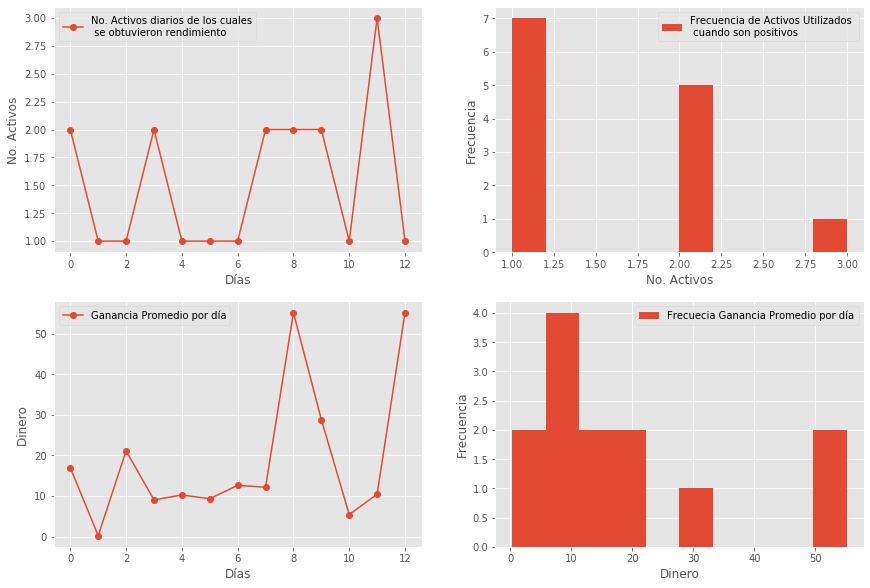

In [12]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(l) for l in profits_day],"o-", label="No. Activos diarios de los cuales\n se obtuvieron rendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")

ax1.hist([len(l) for l in profits_day],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")

ax2.plot([np.mean([k[1] for k in l]) for l in profits_day ],"o-", label="Ganancia Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")

ax3.hist([np.mean([k[1] for k in l]) for l in profits_day ], label="Frecuecia Ganancia Promedio por día")
ax3.legend()
ax3.set_xlabel("Dinero")
ax3.set_ylabel("Frecuencia")

plt.subplots_adjust(right=2., top=2.)
plt.show()

In [ ]:
# Conocer el No. de Activos que tuvieron rendimiento positivo durante el día (Si tuviste más posiciones de pérdia
# que de ganancia sobre un activo no se tomará)
def choose_index(dataframe,l):
    return dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().index.values.tolist()
def choose_values(dataframe,l):
    return  dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()[dataframes[l].iloc[:,[3,12]].groupby("Symbol").sum()<0].dropna().values.tolist()
no_profits_day = [list(zip(*[choose_index(dataframes,l),choose_values(dataframes,l)])) for l in range(len(dataframes))]
no_profits_day = [l for l in no_profits_day if len(l)>=1]
no_profits_day

In [ ]:
fig,((ax,ax1),(ax2,ax3)) = plt.subplots(2,2)
ax.plot([len(l) for l in no_profits_day],"o-", label="No. Activos diarios de los cuales\n no se obtuvieron rendimiento")
ax.legend()
ax.set_xlabel("Días")
ax.set_ylabel("No. Activos")
ax1.hist([len(l) for l in no_profits_day],stacked=True, label="Frecuencia de Activos Utilizados \n cuando son no positivos")
ax1.set_xlabel("No. Activos")
ax1.legend()
ax1.set_ylabel("Frecuencia")
ax2.plot([np.mean([k[1] for k in l]) for l in  no_profits_day ],"o-", label="Pérdida Promedio por día")
ax2.legend()
ax2.set_xlabel("Días")
ax2.set_ylabel("Dinero ")
ax3.hist([np.mean([k[1] for k in l]) for l in no_profits_day ], label="Frecuecia de Pérdida Promedio por día")
ax3.legend()
ax3.set_xlabel("Dinero")
ax3.set_ylabel("Frecuencia")
plt.subplots_adjust(right=2., top=2.)
plt.show()

In [ ]:
data2= pd.read_excel("archivo_tradeview_2.xlsx").sort_index()
data2["'openTime'"] = [data2['openTime'][k][:10] for k in range(data2.shape[0])]

data2['openTime'] = [datetime.strptime(data2["'openTime'"][k], '%Y.%m.%d') for k in range(data2.shape[0])]

In [ ]:
dty=[]
gr = data2.groupby(pd.Grouper(key='openTime',freq='W'))
for name, group in gr:
    if len(group) > 0:        
        dty.append(group)   
dty=[pd.DataFrame(dty[i]).set_index('openTime') for i in range(len(dty))]
dty[0]

In [ ]:
profits_day = [list(zip(*[choose_index(dty,l),choose_values(dty,l)])) for l in range(len(dty))] 
profits_day = [l for l in profits_day if len(l)>=1]
profits_day